# Boston

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
mean_ = train_data.mean(axis=0)
train_data -= mean_
std_ = train_data.std(axis=0)
train_data /= std_

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean_
test_data /= std_

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
import keras
import tensorflow as tf

model = models.Sequential()
model.add(keras.Input(shape = (train_data.shape[1], )))
model.add(layers.Flatten(input_shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,129 (16.13 KB)

 Trainable params: 3,889 (15.19 KB)

 Non-trainable params: 240 (960.00 B)

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels, epochs=1000, batch_size=128, validation_split=0.2)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 224ms/step - loss: 530.4847 - mae: 21.1149 - val_loss: 631.2073 - val_mae: 23.4175
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 557.3481 - mae: 21.6007 - val_loss: 632.2255 - val_mae: 23.4393
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 553.6414 - mae: 21.6625 - val_loss: 633.1812 - val_mae: 23.4594
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 535.3269 - mae: 21.3531 - val_loss: 633.7643 - val_mae: 23.4721
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 549.9379 - mae: 21.4934 - val_loss: 634.3882 - val_mae: 23.4851
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 520.5834 - mae: 21.0146 - val_loss: 634.9881 - val_mae: 23.4973
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 537.5725 - mae: 21.2595 - val_loss: 635.2559 - val_mae: 23.5032
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 523.1770 - mae: 21.0541 - val_loss: 635.7024 - val_mae: 23.5122
Epoch 9/1000
3/

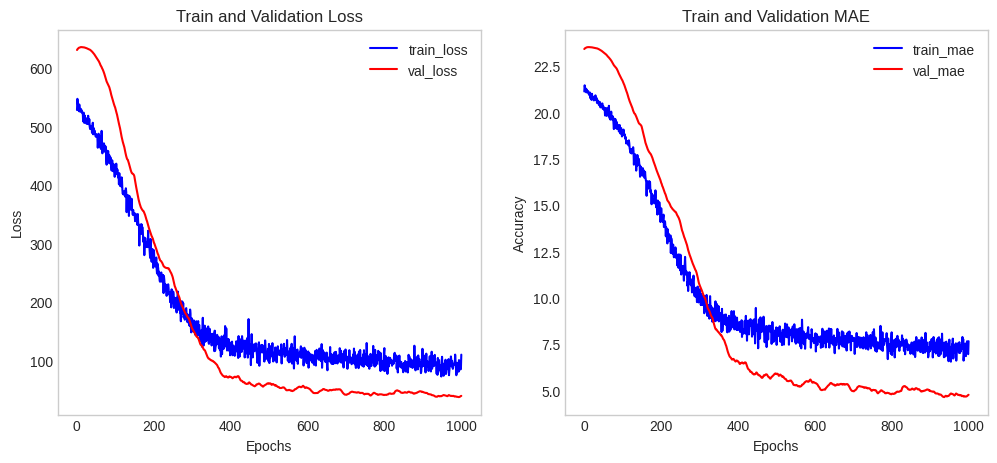

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-v0_8-whitegrid')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 39.9577 - mae: 4.6007 


[43.15507888793945, 4.855660915374756]

# Reuters

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [9]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
reuters = tf.keras.datasets.reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
6736
2246
2246
46


In [14]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    result = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        result[i, d] = 1
    return result

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(np.array(train_labels))
y_val = utils.to_categorical(np.array(val_labels))
y_test = utils.to_categorical(np.array(test_labels))

In [11]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 647,726 (2.47 MB)

 Trainable params: 647,470 (2.47 MB)

 Non-trainable params: 256 (1.00 KB)

In [15]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_callback = callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
early_stopping_callback = callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_val, y_val), callbacks=[checkpoint_callback, early_stopping_callback])

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6303 - loss: 1.7544

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.6315 - loss: 1.7494 - val_accuracy: 0.6959 - val_loss: 2.8847
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6972 - loss: 1.4508

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6978 - loss: 1.4482 - val_accuracy: 0.7048 - val_loss: 2.6616
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7366 - loss: 1.2593

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7367 - loss: 1.2588 - val_accuracy: 0.7026 - val_loss: 2.4488
Epoch 4/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7523 - loss: 1.1498

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7528 - loss: 1.1464 - val_accuracy: 0.7155 - val_loss: 2.2706
Epoch 5/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7901 - loss: 0.9492

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7895 - loss: 0.9530 - val_accuracy: 0.7128 - val_loss: 2.0856
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8006 - loss: 0.8821

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8002 - loss: 0.8837 - val_accuracy: 0.7182 - val_loss: 1.9229
Epoch 7/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8004 - loss: 0.8612

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8007 - loss: 0.8583 - val_accuracy: 0.7244 - val_loss: 1.7481
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8211 - loss: 0.7600

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8211 - loss: 0.7610 - val_accuracy: 0.7248 - val_loss: 1.6017
Epoch 9/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8349 - loss: 0.6998

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8338 - loss: 0.7048 - val_accuracy: 0.7275 - val_loss: 1.4853
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8315 - loss: 0.6892

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8317 - loss: 0.6887 - val_accuracy: 0.7346 - val_loss: 1.4001
Epoch 11/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8499 - loss: 0.6480

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.8502 - loss: 0.6456 - val_accuracy: 0.7453 - val_loss: 1.3081
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8566 - loss: 0.5909

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8566 - loss: 0.5912 - val_accuracy: 0.7404 - val_loss: 1.2413
Epoch 13/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8575 - loss: 0.6111

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8582 - loss: 0.6084 - val_accuracy: 0.7498 - val_loss: 1.1694
Epoch 14/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8567 - loss: 0.5701

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8578 - loss: 0.5680 - val_accuracy: 0.7627 - val_loss: 1.1137
Epoch 15/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8787 - loss: 0.5159

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8785 - loss: 0.5160 - val_accuracy: 0.7680 - val_loss: 1.0833
Epoch 16/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8773 - loss: 0.5078

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8773 - loss: 0.5077 - val_accuracy: 0.7663 - val_loss: 1.0621
Epoch 17/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8926 - loss: 0.4605

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8921 - loss: 0.4614 - val_accuracy: 0.7667 - val_loss: 1.0393
Epoch 18/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8915 - loss: 0.4694

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8913 - loss: 0.4695 - val_accuracy: 0.7743 - val_loss: 1.0187
Epoch 19/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8966 - loss: 0.4160

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8958 - loss: 0.4187 - val_accuracy: 0.7823 - val_loss: 1.0032
Epoch 20/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8964 - loss: 0.4238

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8959 - loss: 0.4247 - val_accuracy: 0.8014 - val_loss: 0.9747
Epoch 21/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8996 - loss: 0.4028

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8995 - loss: 0.4036 - val_accuracy: 0.7956 - val_loss: 0.9737
Epoch 22/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9026 - loss: 0.4039 - val_accuracy: 0.7943 - val_loss: 0.9863
Epoch 23/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9049 - loss: 0.3785

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.9047 - loss: 0.3802 - val_accuracy: 0.8045 - val_loss: 0.9713
Epoch 24/50
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9005 - loss: 0.3786

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9012 - loss: 0.3773 - val_accuracy: 0.8063 - val_loss: 0.9688
Epoch 25/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9111 - loss: 0.3650 - val_accuracy: 0.8050 - val_loss: 0.9847
Epoch 26/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9129 - loss: 0.3542 - val_accuracy: 0.8054 - val_loss: 1.0059
Epoch 27/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9115 - loss: 0.3550 - val_accuracy: 0.8126 - val_loss: 0.9861
Epoch 28/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9209 - loss: 0.3132 - val_accuracy: 0.8063 - val_loss: 0.9996
Epoch 29/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9195 - loss: 0.3325 - val_accuracy: 0.8108 - val_loss: 1.0182


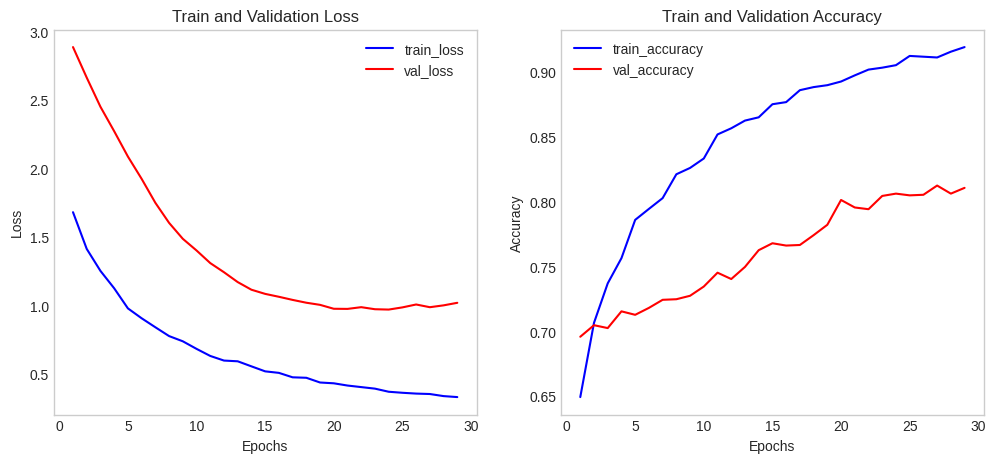

In [16]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-v0_8-whitegrid')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [17]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7958 - loss: 1.1086


[1.1428862810134888, 0.7889581322669983]

# CIFAR10

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [19]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [20]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

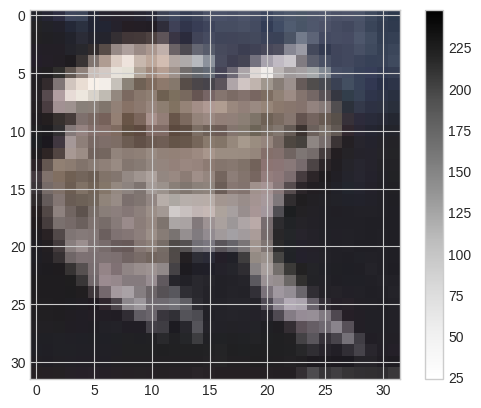

In [21]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [22]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [23]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [29]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Flatten(input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,466 (779.16 KB)

 Trainable params: 199,274 (778.41 KB)

 Non-trainable params: 192 (768.00 B)

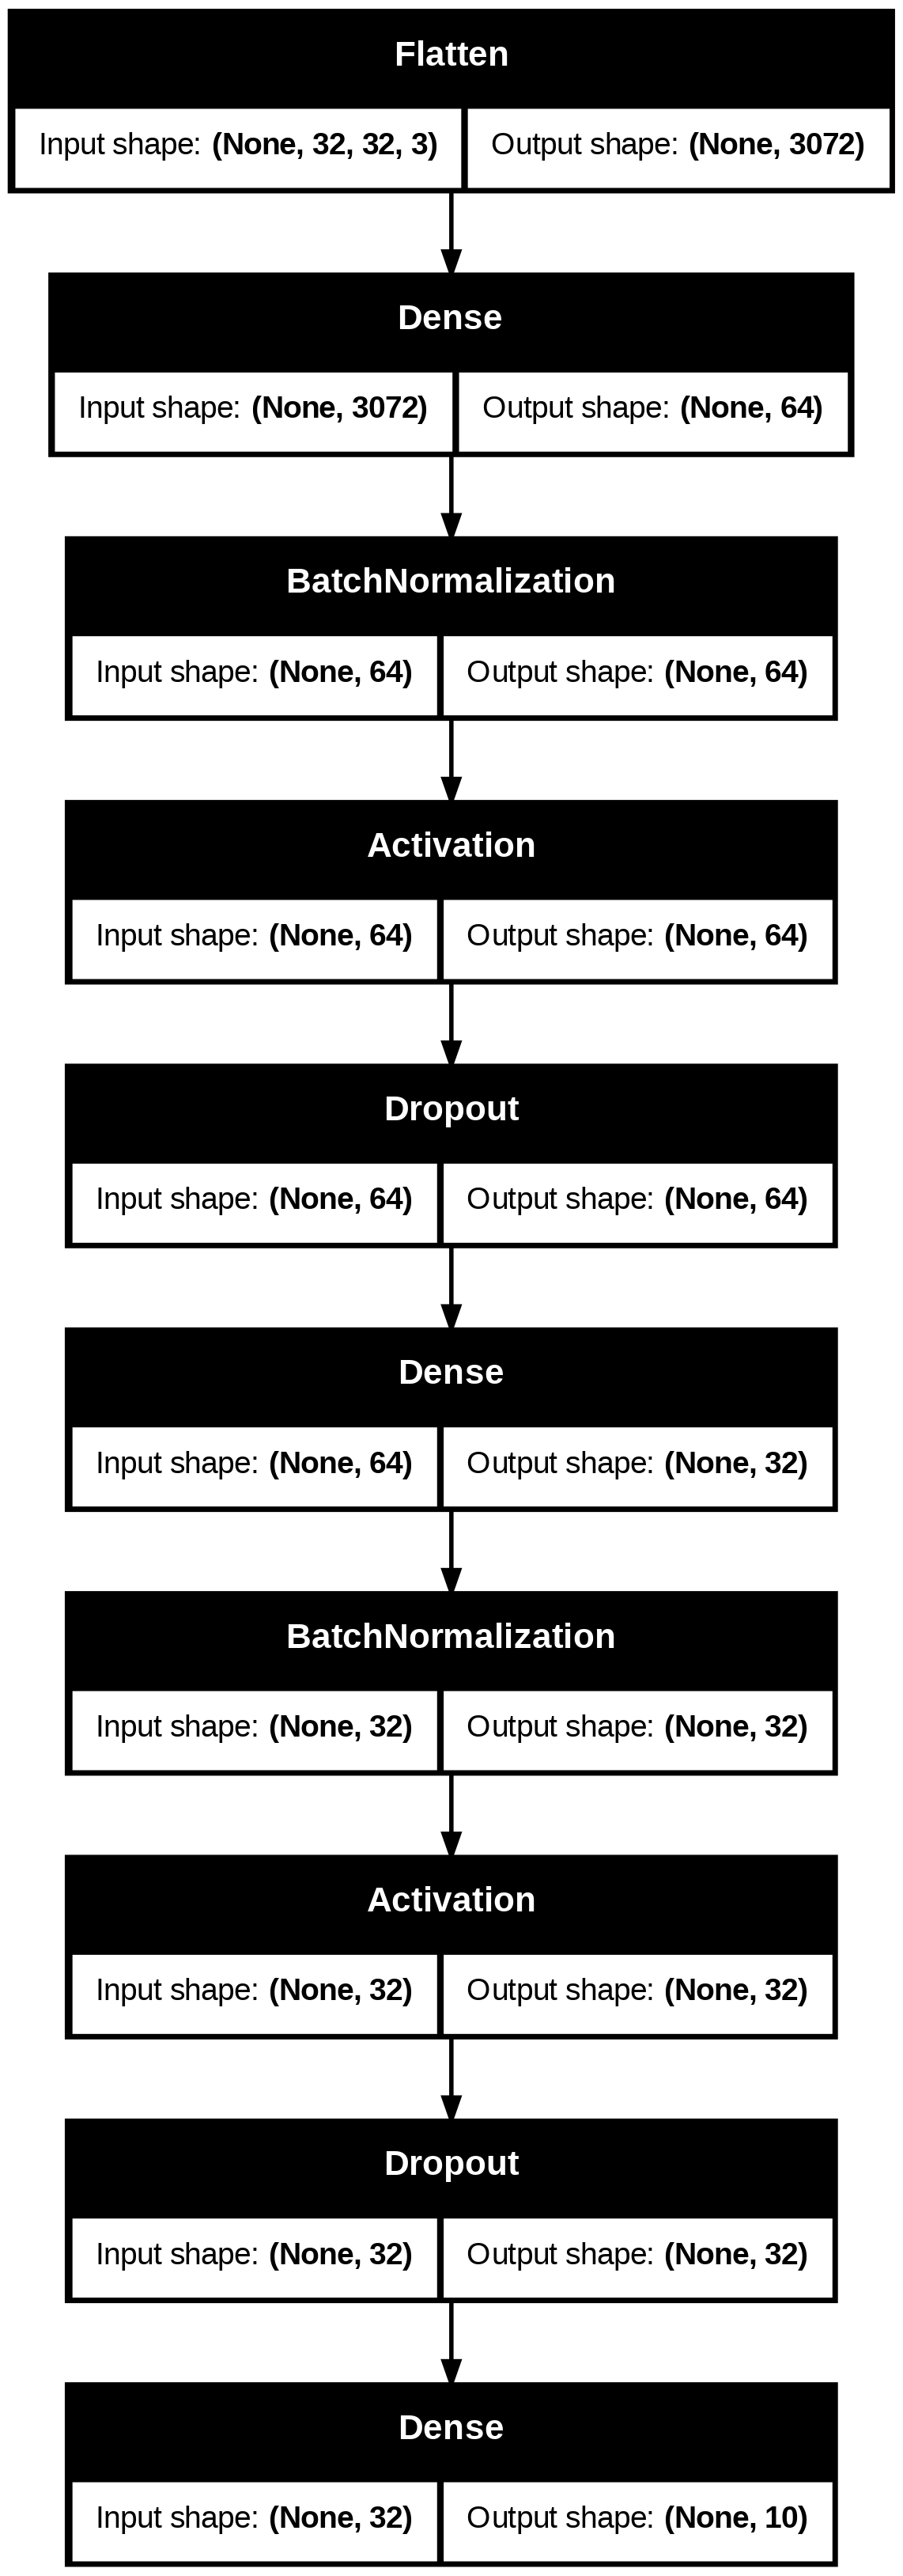

In [31]:
utils.plot_model(model, show_shapes=True)

In [32]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_callback = callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
early_stopping_callback = callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint_callback, early_stopping_callback])

Epoch 1/50
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1555 - loss: 2.5772

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.1557 - loss: 2.5754 - val_accuracy: 0.2782 - val_loss: 2.0423
Epoch 2/50
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2212 - loss: 2.1292

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2213 - loss: 2.1286 - val_accuracy: 0.3313 - val_loss: 1.9324
Epoch 3/50
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2407 - loss: 2.0534

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2408 - loss: 2.0533 - val_accuracy: 0.3321 - val_loss: 1.8875
Epoch 4/50
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2574 - loss: 2.0068

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2575 - loss: 2.0066 - val_accuracy: 0.3444 - val_loss: 1.8592
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2750 - loss: 1.9684

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.2750 - loss: 1.9684 - val_accuracy: 0.3446 - val_loss: 1.8440
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2836 - loss: 1.9535 - val_accuracy: 0.3194 - val_loss: 1.8826
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2864 - loss: 1.9393 - val_accuracy: 0.3389 - val_loss: 1.8534
Epoch 8/50
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2895 - loss: 1.9323

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.2895 - loss: 1.9324 - val_accuracy: 0.3461 - val_loss: 1.8370
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2908 - loss: 1.9295 - val_accuracy: 0.3232 - val_loss: 1.8619
Epoch 10/50
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2939 - loss: 1.9256

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2939 - loss: 1.9255 - val_accuracy: 0.3509 - val_loss: 1.8166
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2998 - loss: 1.9151 - val_accuracy: 0.3398 - val_loss: 1.8196
Epoch 12/50
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3015 - loss: 1.9124

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3015 - loss: 1.9124 - val_accuracy: 0.3454 - val_loss: 1.8158
Epoch 13/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3010 - loss: 1.9046 - val_accuracy: 0.3384 - val_loss: 1.8158
Epoch 14/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3096 - loss: 1.8966 - val_accuracy: 0.3344 - val_loss: 1.8234
Epoch 15/50
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3112 - loss: 1.8892

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3111 - loss: 1.8893 - val_accuracy: 0.3617 - val_loss: 1.8071
Epoch 16/50
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3125 - loss: 1.8879

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3124 - loss: 1.8880 - val_accuracy: 0.3485 - val_loss: 1.7956
Epoch 17/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3089 - loss: 1.8966 - val_accuracy: 0.2161 - val_loss: 2.2176
Epoch 18/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3184 - loss: 1.8933 - val_accuracy: 0.3469 - val_loss: 1.7985
Epoch 19/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3131 - loss: 1.8945 - val_accuracy: 0.3134 - val_loss: 1.8457
Epoch 20/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3092 - loss: 1.8932 - val_accuracy: 0.3510 - val_loss: 1.8081
Epoch 21/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3079 - loss: 1.8920 - val_accuracy: 0.3338 - val_loss: 1.8074


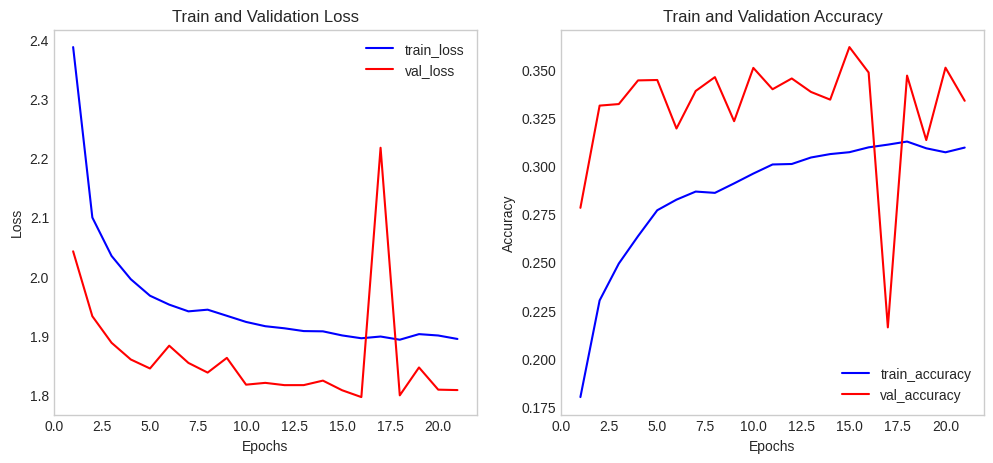

In [33]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-v0_8-whitegrid')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [34]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3425 - loss: 1.8077


[1.8081908226013184, 0.33820000290870667]